In [59]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
current_year = datetime.now().year

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Timmy\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [96]:
df = pd.read_csv('df_nmf.csv', index_col = False)

In [97]:
df['Review'].isna().sum()

0

In [98]:
def get_sentiment_score(text):
    return sid.polarity_scores(text)['compound']

df['Sentiment Score'] = df['Review'].apply(get_sentiment_score)

<Axes: >

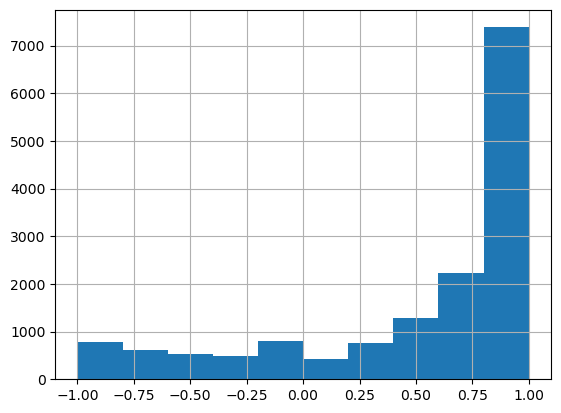

In [99]:
df['Sentiment Score'].hist()

<Axes: >

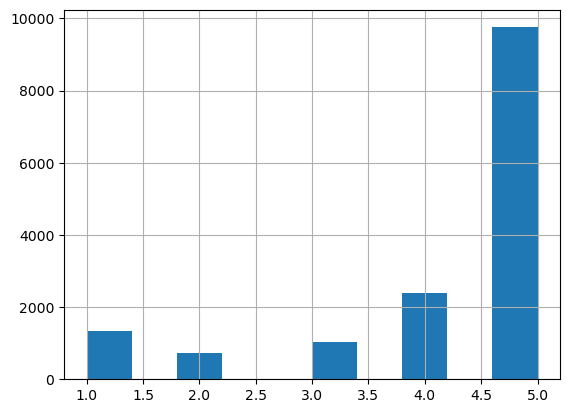

In [100]:
df['Rating'].hist()

looks like the distributions are relatively similar, main issue is that 5s will dominate, so will weight the less sentiments higher

In [101]:
df.columns

Index(['Unnamed: 0', 'id', 'Car Brand', 'Car Model', 'Year', 'Review',
       'Rating', 'Value Rating', 'Performance Rating', 'Quality Rating',
       'Comfort Rating', 'Reliability Rating', 'Styling Rating',
       'Vehicle Class', 'Model Full Name', 'Horsepower (hp)',
       'Curb Weight (lbs)', 'Combined MPG', 'Fuel Capacity (gallons)',
       'Drivetrain', 'Recommended Fuel', 'Average MSRP Price ($)',
       'Average KBB Fair Price ($)', 'Review_Topics', 'Topic_0', 'Topic_1',
       'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5', 'Topic_6', 'Topic_7',
       'Topic_8', 'Topic_9', 'Sentiment Score'],
      dtype='object')

In [102]:
83591469.98218836**0.5

9142.837086057498

<Axes: >

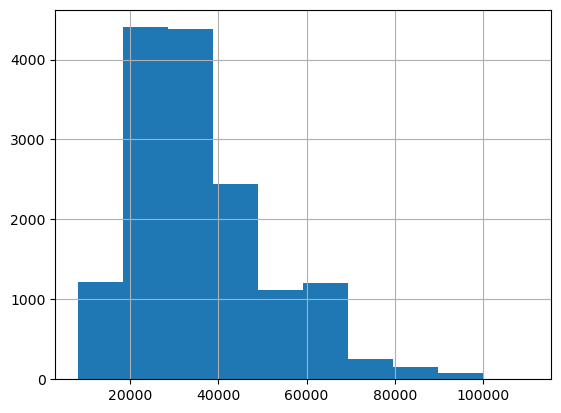

In [103]:
df['Average MSRP Price ($)'].hist()

In [129]:
# https://www.kbb.com/car-depreciation/
# fits exponential decay
from datetime import datetime
import numpy as np

def dep_value(msrp, year):
    age = current_year - year
    decay_constant = 0.163#constant using data from kbb, v close fit
    depreciated_value = msrp * np.exp(-decay_constant * age)
    
    return depreciated_value

def apply_dep(row):
    msrp = row['Average MSRP Price ($)']
    year = row['Year']
    return dep_value(msrp, year)
df['Age'] = current_year - df['Year']
df['Depreciated Value'] = df.apply(apply_dep, axis=1)


In [130]:
df.to_csv('final_cleaned.csv', index = False)

In [131]:
df = pd.read_csv('final_cleaned.csv', index_col = False)
df

,Unnamed: 0,id,Car Brand,Car Model,Year,Review,Rating,Value Rating,Performance Rating,Quality Rating,...,Weighted Sentiment Score,Topic_0_Weighted,Topic_2_Weighted,Topic_3_Weighted,Topic_4_Weighted,Topic_5_Weighted,Topic_7_Weighted,Topic_8_Weighted,Topic_9_Weighted,Age
0,0,0,honda,accord,2010,I've driven my LX over 13 years and the only t...,5.0,5.0,5.0,5.0,...,5.246697,0.016897,0.027835,0.251757,0.155360,0.000000,0.000000,0.0000,0.013695,14
1,1,1,honda,accord,2010,I have this car for 10 years have given me no ...,5.0,5.0,5.0,5.0,...,2.804933,0.000000,0.000000,0.191840,0.000000,0.000000,0.000000,0.0000,0.000000,14
2,2,2,honda,accord,2010,"My 2012 Honda Accord is great, It handles grea...",5.0,4.0,5.0,5.0,...,2.024125,0.020700,0.002354,0.112178,0.034583,0.000000,0.017148,0.0000,0.000000,14
3,3,3,honda,accord,2010,My sibling has this car. I may be a computer p...,5.0,5.0,5.0,5.0,...,1.759561,0.008315,0.085711,0.000612,0.000000,0.000000,0.000000,0.0000,0.000000,14
4,4,4,honda,accord,2010,"I've had this car for 7 years, it's dependable...",5.0,5.0,5.0,5.0,...,4.582801,0.012000,0.012650,0.040147,0.096403,0.007267,0.008031,0.0087,0.019766,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15255,15255,15261,mercedes-benz,a-class,2019,I just traded in my 2016 Mercedes GLA 250 for ...,5.0,5.0,5.0,5.0,...,1.934215,0.043080,0.000000,0.024219,0.005284,0.000000,0.003885,0.0000,0.000000,5
15256,15256,15262,mercedes-benz,a-class,2019,"Great car, fun to drive and very quick. I had ...",5.0,4.5,4.0,5.0,...,1.999529,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.295282,5
15257,15257,15263,mercedes-benz,a-class,2019,Awesome car. Really smooth drive satisfying lo...,5.0,5.0,3.0,5.0,...,2.007590,0.080940,0.002619,0.000049,0.028772,0.000000,0.000000,0.0000,0.035919,5
15258,15258,15264,mercedes-benz,a-class,2019,I got this car just because I have always boug...,1.0,2.0,1.0,2.0,...,1.657662,0.043754,0.000000,0.041200,0.000000,0.000000,0.000000,0.0000,0.000000,5


In [135]:
df.columns

Index(['Unnamed: 0', 'id', 'Car Brand', 'Car Model', 'Year', 'Review',
       'Rating', 'Value Rating', 'Performance Rating', 'Quality Rating',
       'Comfort Rating', 'Reliability Rating', 'Styling Rating',
       'Vehicle Class', 'Model Full Name', 'Horsepower (hp)',
       'Curb Weight (lbs)', 'Combined MPG', 'Fuel Capacity (gallons)',
       'Drivetrain', 'Recommended Fuel', 'Average MSRP Price ($)',
       'Average KBB Fair Price ($)', 'Review_Topics', 'Topic_0', 'Topic_1',
       'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5', 'Topic_6', 'Topic_7',
       'Topic_8', 'Topic_9', 'Sentiment Score', 'Depreciated Value',
       'Sentiment Bin', 'Weighted Sentiment Score', 'Topic_0_Weighted',
       'Topic_2_Weighted', 'Topic_3_Weighted', 'Topic_4_Weighted',
       'Topic_5_Weighted', 'Topic_7_Weighted', 'Topic_8_Weighted',
       'Topic_9_Weighted', 'Age'],
      dtype='object')

In [29]:
df.Drivetrain.value_counts()

Drivetrain
FWD    6010
AWD    3158
2WD    2336
RWD    1998
4WD    1758
Name: count, dtype: int64

In [140]:
# X = df[['Horsepower (hp)', 'Curb Weight (lbs)', 'Combined MPG', 'Fuel Capacity (gallons)', 'Drivetrain', 'Recommended Fuel', 'Age']]
# y = df['Depreciated Value']

# X = X.copy() 
# label_encoder = LabelEncoder()
# X = pd.get_dummies(X, columns=['Drivetrain', 'Recommended Fuel'], drop_first=True)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

# pipeline = Pipeline([
#     ('scaler', StandardScaler()),  # Step 1: Normalize the data
#     ('xgb', XGBRegressor(random_state=22))  # Step 2: XGBoost model
# ])

# param_grid = {
#     'xgb__n_estimators': [200, 300],
#     'xgb__learning_rate': [0.1, 0.2],
#     'xgb__max_depth': [3, 5, 7],
#     'xgb__subsample': [0.8, 1.0],
#     'xgb__colsample_bytree': [0.8, 1.0]
# }

# grid_search = GridSearchCV(
#     estimator=pipeline,
#     param_grid=param_grid,
#     cv=5,  # 5-fold cross-validation
#     scoring='neg_mean_squared_error',
#     n_jobs=-1,  # Use all available CPU cores
#     verbose=2
# )

# # Fit the grid search
# grid_search.fit(X_train, y_train)

# # Best parameters and best score
# best_params = grid_search.best_params_
# best_score = -grid_search.best_score_  # Convert to positive MSE
# print("Best parameters found: ", best_params)
# print("Best cross-validation MSE: ", best_score)

# # Use the best model to make predictions
# best_xgb_model = grid_search.best_estimator_
# y_pred_xgb_best = best_xgb_model.predict(X_test)
# mse_xgb_best = mean_squared_error(y_test, y_pred_xgb_best)
# print(f'Tuned XGBoost MSE on test data: {mse_xgb_best}')

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found:  {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.2, 'xgb__max_depth': 5, 'xgb__n_estimators': 300, 'xgb__subsample': 0.8}
Best cross-validation MSE:  23627.224721868628
Tuned XGBoost MSE on test data: 715.1234640027473


In [141]:
# mse_xgb_best**0.5

26.741792460542865

In [148]:
# y_pred_full = best_xgb_model.predict(X)
# df['Predicted Depreciated Value'] = y_pred_full
# df.head()

,id,Car Brand,Car Model,Year,Review,Rating,Value Rating,Performance Rating,Quality Rating,Comfort Rating,...,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Sentiment Score,Depreciated Value,Age,Predicted Depreciated Value
0,0,honda,accord,2010,I've driven my LX over 13 years and the only t...,5.0,5.0,5.0,5.0,5.0,...,0.029611,0.000000,0.001949,0.000000,0.000000,0.002610,0.7650,2563.99045,14,2565.037842
1,1,honda,accord,2010,I have this car for 10 years have given me no ...,5.0,5.0,5.0,5.0,5.0,...,0.000000,0.000000,0.000140,0.000000,0.000000,0.000000,0.0772,2563.99045,14,2565.037842
2,2,honda,accord,2010,"My 2012 Honda Accord is great, It handles grea...",5.0,4.0,5.0,5.0,5.0,...,0.017086,0.000000,0.000000,0.008472,0.000000,0.000000,0.9793,2563.99045,14,2565.037842
3,3,honda,accord,2010,My sibling has this car. I may be a computer p...,5.0,5.0,5.0,5.0,5.0,...,0.000000,0.000000,0.052338,0.000000,0.000000,0.000000,0.8513,2563.99045,14,2565.037842
4,4,honda,accord,2010,"I've had this car for 7 years, it's dependable...",5.0,5.0,5.0,5.0,5.0,...,0.021036,0.001586,0.047316,0.001752,0.001899,0.004313,0.6682,2563.99045,14,2565.037842


In [ ]:
car_data_encoded

In [159]:
#unaggregated
#brand dummies
car_data_encoded = pd.get_dummies(df, columns=['Car Brand'], drop_first=True)

functional_features = [
    'Horsepower (hp)', 'Curb Weight (lbs)', 'Combined MPG', 'Fuel Capacity (gallons)','Depreciated Value', 'Age'
]
features = functional_features


y_price = car_data_encoded['Average KBB Fair Price ($)']
X = car_data_encoded[features]

price_model = LinearRegression()
price_model.fit(X, y_price)
y_pred = price_model.predict(X)

r2 = r2_score(y_price, y_pred)
rmse = np.sqrt(mean_squared_error(y_price, y_pred))


price_coefficients = dict(zip(X.columns, price_model.coef_))
print({
    "Model Coefficients": price_coefficients,
    "Intercept": price_model.intercept_,
    "R^2": r2,
    "RMSE": rmse
})

{'Model Coefficients': {'Horsepower (hp)': 25.568375075085882, 'Curb Weight (lbs)': -1.8658292163233754, 'Combined MPG': -7.997397274916108, 'Fuel Capacity (gallons)': 288.4350296134212, 'Depreciated Value': 0.6841837420455749, 'Age': -520.0782409426604}, 'Intercept': 8230.511115673735, 'R^2': 0.8451266718949353, 'RMSE': 3566.638852879417}


In [151]:
#aggregated
aggregated_data = df.groupby(['Car Brand', 'Car Model', 'Year']).agg({
    'Horsepower (hp)': 'mean',
    'Curb Weight (lbs)': 'mean',
    'Combined MPG': 'mean',
    'Fuel Capacity (gallons)': 'mean',
    'Depreciated Value': 'mean',
    'Age': 'mean',
    'Average KBB Fair Price ($)': 'mean'
}).reset_index()

car_data_encoded = pd.get_dummies(aggregated_data, columns=['Car Brand'], drop_first=True)

functional_features = [
    'Horsepower (hp)', 'Curb Weight (lbs)', 'Combined MPG', 'Fuel Capacity (gallons)', 'Depreciated Value', 'Age'
]
y_price = car_data_encoded['Average KBB Fair Price ($)']
X = car_data_encoded[functional_features]

price_model = LinearRegression()
price_model.fit(X, y_price)
y_pred = price_model.predict(X)

r2 = r2_score(y_price, y_pred)
rmse = np.sqrt(mean_squared_error(y_price, y_pred))

price_coefficients = dict(zip(X.columns, price_model.coef_))
print({
    "Model Coefficients": price_coefficients,
    "Intercept": price_model.intercept_,
    "R^2": r2,
    "RMSE": rmse
})


{'Model Coefficients': {'Horsepower (hp)': 17.057575858388176, 'Curb Weight (lbs)': -1.120404711788916, 'Combined MPG': -12.002228553538046, 'Fuel Capacity (gallons)': 223.19174817182324, 'Depreciated Value': 0.6887489765453407, 'Age': -536.499644472832}, 'Intercept': 8693.284600324092, 'R^2': 0.8898018565680373, 'RMSE': 3819.4884702058785}


In [146]:
aggregated_data

,Car Brand,Car Model,Year,Horsepower (hp),Curb Weight (lbs),Combined MPG,Fuel Capacity (gallons),Depreciated Value,Age,Sentiment Score,Average KBB Fair Price ($)
0,acura,rdx,2010,240.0,3931.0,19.0,18.0,3611.584836,14.0,0.552172,7210.0
1,acura,rdx,2013,273.0,3838.0,22.0,16.0,6094.934355,11.0,0.499811,10589.0
2,acura,rdx,2019,272.0,3783.0,24.0,17.1,19243.744757,5.0,0.321741,23046.5
3,acura,tlx,2015,206.0,3483.0,28.0,17.2,8454.970001,9.0,0.633109,11905.5
4,acura,tlx,2021,272.0,3709.0,25.0,15.9,28420.576610,3.0,0.675924,29701.0
...,...,...,...,...,...,...,...,...,...,...,...
321,volvo,xc40,2019,187.0,3574.0,27.0,14.2,16851.279193,5.0,0.698563,18941.0
322,volvo,xc60,2010,235.0,4012.0,21.0,18.5,3899.194793,14.0,0.613741,7055.0
323,volvo,xc60,2018,316.0,4074.0,23.0,18.8,18838.849543,6.0,0.281155,23469.0
324,volvo,xc90,2010,235.0,4751.0,17.0,21.1,4591.551326,14.0,0.557620,6471.0


In [230]:
car_data_encoded['Average KBB Fair Price ($)'].mean()

13698.513073394495

In [228]:
selected_topics = ['Topic_0', 'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5', 'Topic_7', 'Topic_8', 'Topic_9']

for topic in selected_topics:
    df[f'{topic}_Weighted'] = df[topic] * df['Sentiment Score']

weighted_topic_features = [f'{topic}_Weighted' for topic in selected_topics]
features = functional_features + weighted_topic_features + [col for col in car_data_encoded.columns if col.startswith('Car Brand_')]
X = car_data_encoded[features]

price_model = LinearRegression()
price_model.fit(X, y_price)
y_pred = price_model.predict(X)

r2 = r2_score(y_price, y_pred)
rmse = np.sqrt(mean_squared_error(y_price, y_pred))


price_coefficients = dict(zip(X.columns, price_model.coef_))
print({
    "Model Coefficients": price_coefficients,
    "Intercept": price_model.intercept_,
    "R^2": r2,
    "RMSE": rmse
})

{'Model Coefficients': {'Horsepower (hp)': 22.460187559245977, 'Curb Weight (lbs)': -1.7670802360913875, 'Combined MPG': -33.71035570026763, 'Fuel Capacity (gallons)': 180.01280355866865, 'Predicted Depreciated Value': 0.752663227968295, 'Age': -429.53819757132544, 'Topic_0_Weighted': -5211.217872898879, 'Topic_2_Weighted': -4745.761808807861, 'Topic_3_Weighted': -158.26303379230333, 'Topic_4_Weighted': 1707.5456300897908, 'Topic_5_Weighted': 22675.84736920882, 'Topic_7_Weighted': -3058.435420224788, 'Topic_8_Weighted': -803.8174141841773, 'Topic_9_Weighted': 7143.735270217841, 'Car Brand_alfa-romeo': -4502.269342860307, 'Car Brand_audi': -1633.6672497195786, 'Car Brand_bmw': -2253.8670780681095, 'Car Brand_buick': -2229.601998377012, 'Car Brand_cadillac': -1977.8782476284875, 'Car Brand_chevrolet': 2442.956566768568, 'Car Brand_chrysler': -877.6876596347572, 'Car Brand_dodge': 957.264210483173, 'Car Brand_fiat': -3479.676722813474, 'Car Brand_ford': 965.8937170042932, 'Car Brand_genes

In [226]:
selected_topics = ['Topic_0', 'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5', 'Topic_7', 'Topic_8', 'Topic_9']

df['Sentiment Bin'] = pd.cut(df['Sentiment Score'], bins=10)
sentiment_counts = df['Sentiment Bin'].value_counts(normalize=True)
sentiment_weights = {interval: 1 / freq for interval, freq in sentiment_counts.items()}

df['Weighted Sentiment Score'] = df.apply(
    lambda row: row['Sentiment Score'] * sentiment_weights.get(row['Sentiment Bin'], 1), axis=1
)

for topic in selected_topics:
    df[f'{topic}_Weighted'] = df[topic] * df['Weighted Sentiment Score']

weighted_topic_features = [f'{topic}_Weighted' for topic in selected_topics]
features = functional_features + weighted_topic_features + ['Weighted Sentiment Score'] + [col for col in car_data_encoded.columns if col.startswith('Car Brand_')]
X = car_data_encoded[features]

price_model = LinearRegression()
price_model.fit(X, y_price)
y_pred = price_model.predict(X)

r2 = r2_score(y_price, y_pred)
rmse = np.sqrt(mean_squared_error(y_price, y_pred))


price_coefficients = dict(zip(X.columns, price_model.coef_))
print({
    "Model Coefficients": price_coefficients,
    "Intercept": price_model.intercept_,
    "R^2": r2,
    "RMSE": rmse
})

{'Model Coefficients': {'Horsepower (hp)': 22.45430522645443, 'Curb Weight (lbs)': -1.765488418513397, 'Combined MPG': -33.687072856055636, 'Fuel Capacity (gallons)': 179.75677184027896, 'Predicted Depreciated Value': 0.7527748710690472, 'Age': -429.73605234608794, 'Topic_0_Weighted': -6091.488625287445, 'Topic_2_Weighted': -5062.907650755795, 'Topic_3_Weighted': -1700.477960801018, 'Topic_4_Weighted': 1483.5027571441397, 'Topic_5_Weighted': 22443.34729326586, 'Topic_7_Weighted': -3263.983244492008, 'Topic_8_Weighted': -1236.726880493058, 'Topic_9_Weighted': 6936.647752017921, 'Weighted Sentiment Score': 7.967002324862918, 'Car Brand_alfa-romeo': -4511.668731994097, 'Car Brand_audi': -1634.3073355171862, 'Car Brand_bmw': -2259.110193607952, 'Car Brand_buick': -2233.2568014992207, 'Car Brand_cadillac': -1986.6950907265266, 'Car Brand_chevrolet': 2435.1528629595396, 'Car Brand_chrysler': -886.5087439447693, 'Car Brand_dodge': 948.1577945980821, 'Car Brand_fiat': -3471.5485779383894, 'Car

In [154]:
#aggregated
selected_topics = ['Topic_0', 'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5', 'Topic_7', 'Topic_8', 'Topic_9']

for topic in selected_topics:
    df[f'{topic}_Weighted'] = df[topic] * df['Sentiment Score']

aggregation_dict = {feature: 'mean' for feature in functional_features + [f'{topic}_Weighted' for topic in selected_topics] + ['Sentiment Score', 'Average KBB Fair Price ($)']}
aggregated_data = df.groupby(['Car Brand', 'Car Model', 'Year']).agg(aggregation_dict).reset_index()

car_data_encoded = pd.get_dummies(aggregated_data, columns=['Car Brand'], drop_first=True)

weighted_topic_features = [f'{topic}_Weighted' for topic in selected_topics]
features = functional_features + weighted_topic_features + [col for col in car_data_encoded.columns if col.startswith('Car Brand_')]
X = car_data_encoded[features]
y_price = car_data_encoded['Average KBB Fair Price ($)']

price_model = LinearRegression()
price_model.fit(X, y_price)
y_pred = price_model.predict(X)

# Step 6: Calculate R^2 and RMSE
r2 = r2_score(y_price, y_pred)
rmse = np.sqrt(mean_squared_error(y_price, y_pred))

# Display results
price_coefficients = dict(zip(X.columns, price_model.coef_))
print({
    "Model Coefficients": price_coefficients,
    "Intercept": price_model.intercept_,
    "R^2": r2,
    "RMSE": rmse
})

{'Model Coefficients': {'Horsepower (hp)': 9.951847831747067, 'Curb Weight (lbs)': -0.609851555237588, 'Combined MPG': -41.663401097265215, 'Fuel Capacity (gallons)': 58.64530619112661, 'Depreciated Value': 0.7498185075029985, 'Age': -459.6351740015237, 'Topic_0_Weighted': -70464.21379507559, 'Topic_2_Weighted': -86735.5673119649, 'Topic_3_Weighted': -6974.309075009485, 'Topic_4_Weighted': 94910.44651228923, 'Topic_5_Weighted': 90963.45914037224, 'Topic_7_Weighted': -42576.994307552384, 'Topic_8_Weighted': 12399.271797819607, 'Topic_9_Weighted': 157583.35660441002, 'Car Brand_alfa-romeo': -6964.901401349151, 'Car Brand_audi': -2255.8462243756812, 'Car Brand_bmw': -2330.03628810575, 'Car Brand_buick': -2297.460233533873, 'Car Brand_cadillac': 675.7336670046509, 'Car Brand_chevrolet': 2648.2446250568546, 'Car Brand_chrysler': -799.7129168873041, 'Car Brand_dodge': 375.70625766388963, 'Car Brand_fiat': -5056.617807825531, 'Car Brand_ford': 882.8215275007424, 'Car Brand_genesis': -1391.401

In [184]:
df.columns

Index(['id', 'Car Brand', 'Car Model', 'Year', 'Review', 'Rating',
       'Value Rating', 'Performance Rating', 'Quality Rating',
       'Comfort Rating', 'Reliability Rating', 'Styling Rating',
       'Vehicle Class', 'Model Full Name', 'Horsepower (hp)',
       'Curb Weight (lbs)', 'Combined MPG', 'Fuel Capacity (gallons)',
       'Drivetrain', 'Recommended Fuel', 'Average MSRP Price ($)',
       'Average KBB Fair Price ($)', 'Review_Topics', 'Topic_0', 'Topic_1',
       'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5', 'Topic_6', 'Topic_7',
       'Topic_8', 'Topic_9', 'Sentiment Score', 'Depreciated Value', 'Age',
       'Predicted Depreciated Value', 'Sentiment Bin',
       'Weighted Sentiment Score', 'Topic_0_Weighted', 'Topic_2_Weighted',
       'Topic_3_Weighted', 'Topic_4_Weighted', 'Topic_5_Weighted',
       'Topic_7_Weighted', 'Topic_8_Weighted', 'Topic_9_Weighted'],
      dtype='object')

In [188]:
df['Experiential'] = df['Average KBB Fair Price ($)'] - (df['Average MSRP Price ($)'] - df['Predicted Depreciated Value'])

In [190]:
features = weighted_topic_features + ['Weighted Sentiment Score'] + [col for col in car_data_encoded.columns if col.startswith('Car Brand_')]
X = car_data_encoded[features]

price_model = LinearRegression()
price_model.fit(X, y_price)
y_pred = price_model.predict(X)

r2 = r2_score(y_price, y_pred)
rmse = np.sqrt(mean_squared_error(y_price, y_pred))


price_coefficients = dict(zip(X.columns, price_model.coef_))
print({
    "Model Coefficients": price_coefficients,
    "Intercept": price_model.intercept_,
    "R^2": r2,
    "RMSE": rmse
})

{'Model Coefficients': {'Topic_0_Weighted': 1169.0271292048278, 'Topic_2_Weighted': -6189.271893205992, 'Topic_3_Weighted': -1190.695017729757, 'Topic_4_Weighted': 2006.764018624654, 'Topic_5_Weighted': -5588.953947516695, 'Topic_7_Weighted': 484.9817730607681, 'Topic_8_Weighted': -1098.8466989400458, 'Topic_9_Weighted': -1656.600240532276, 'Weighted Sentiment Score': 58.814187896306855, 'Car Brand_alfa-romeo': 20394.52816306144, 'Car Brand_audi': 10749.620133888864, 'Car Brand_bmw': 16394.077387887326, 'Car Brand_buick': -3404.4365951404516, 'Car Brand_cadillac': 11190.709336719827, 'Car Brand_chevrolet': -4462.3763386800265, 'Car Brand_chrysler': -6606.714463329258, 'Car Brand_dodge': -4697.736381600263, 'Car Brand_fiat': -12717.047649612468, 'Car Brand_ford': -7924.414152451458, 'Car Brand_genesis': 10552.238723428822, 'Car Brand_gmc': -5196.691499243723, 'Car Brand_honda': -5806.562561590218, 'Car Brand_hyundai': -10371.038877963996, 'Car Brand_infiniti': 14574.402911317506, 'Car B

In [204]:
df.columns

Index(['id', 'Car Brand', 'Car Model', 'Year', 'Review', 'Rating',
       'Value Rating', 'Performance Rating', 'Quality Rating',
       'Comfort Rating', 'Reliability Rating', 'Styling Rating',
       'Vehicle Class', 'Model Full Name', 'Horsepower (hp)',
       'Curb Weight (lbs)', 'Combined MPG', 'Fuel Capacity (gallons)',
       'Drivetrain', 'Recommended Fuel', 'Average MSRP Price ($)',
       'Average KBB Fair Price ($)', 'Review_Topics', 'Topic_0', 'Topic_1',
       'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5', 'Topic_6', 'Topic_7',
       'Topic_8', 'Topic_9', 'Sentiment Score', 'Depreciated Value', 'Age',
       'Predicted Depreciated Value', 'Sentiment Bin',
       'Weighted Sentiment Score', 'Topic_0_Weighted', 'Topic_2_Weighted',
       'Topic_3_Weighted', 'Topic_4_Weighted', 'Topic_5_Weighted',
       'Topic_7_Weighted', 'Topic_8_Weighted', 'Topic_9_Weighted',
       'Experiential'],
      dtype='object')

<Axes: >

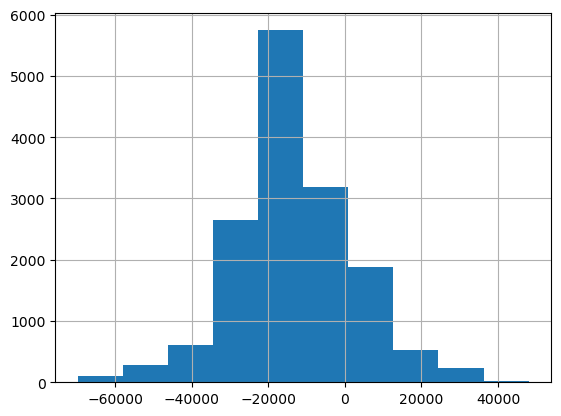

In [196]:
df['Experiential'].hist()

In [198]:
X = df[['Horsepower (hp)', 'Curb Weight (lbs)', 'Combined MPG', 'Fuel Capacity (gallons)', 'Drivetrain', 'Recommended Fuel', 'Age']]
y = df['Depreciated Value']

X = pd.get_dummies(X, columns=['Drivetrain', 'Recommended Fuel'], drop_first=True)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

# Define the pipeline with scaling and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Normalize the data
    ('lr', LinearRegression())     # Step 2: Linear Regression model
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_lr = pipeline.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'Linear Regression MSE on test data: {mse_lr}')

Linear Regression MSE on test data: 14615992.996058043


In [200]:
14615992.996058043**0.5

3823.0868412917384

In [244]:
df['Model Full Name'].value_counts()[:30]

Model Full Name
Gmc Yukon-xl                536
Hyundai Elantra             221
Hyundai Sonata              207
Kia Sportage                182
Honda Accord                170
Hyundai Tucson              168
Nissan Rogue                168
Subaru Outback              168
Subaru Forester             168
Chevrolet Silverado-1500    167
Lexus Es                    167
Honda Odyssey               167
Jeep Compass                167
Ford Explorer               167
Kia Optima                  167
Gmc Sierra-1500             166
Ford Escape                 166
Chevrolet Malibu            166
Toyota Rav4                 166
Bmw X3                      166
Kia Sorento                 165
Volkswagen Jetta            165
Acura Rdx                   165
Nissan Altima               164
Toyota Highlander           162
Toyota Camry                161
Toyota Corolla              160
Chevrolet Corvette          155
Bmw X5                      155
Toyota Avalon               151
Name: count, dtype: int6

In [238]:
df.columns

Index(['id', 'Car Brand', 'Car Model', 'Year', 'Review', 'Rating',
       'Value Rating', 'Performance Rating', 'Quality Rating',
       'Comfort Rating', 'Reliability Rating', 'Styling Rating',
       'Vehicle Class', 'Model Full Name', 'Horsepower (hp)',
       'Curb Weight (lbs)', 'Combined MPG', 'Fuel Capacity (gallons)',
       'Drivetrain', 'Recommended Fuel', 'Average MSRP Price ($)',
       'Average KBB Fair Price ($)', 'Review_Topics', 'Topic_0', 'Topic_1',
       'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5', 'Topic_6', 'Topic_7',
       'Topic_8', 'Topic_9', 'Sentiment Score', 'Depreciated Value', 'Age',
       'Predicted Depreciated Value', 'Sentiment Bin',
       'Weighted Sentiment Score', 'Topic_0_Weighted', 'Topic_2_Weighted',
       'Topic_3_Weighted', 'Topic_4_Weighted', 'Topic_5_Weighted',
       'Topic_7_Weighted', 'Topic_8_Weighted', 'Topic_9_Weighted',
       'Experiential'],
      dtype='object')

In [156]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd

# Define functional and experiential features
functional_features = [
    'Horsepower (hp)', 'Curb Weight (lbs)', 'Combined MPG', 'Fuel Capacity (gallons)', 'Depreciated Value', 'Age'
]
selected_topics = ['Topic_0', 'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5', 'Topic_7', 'Topic_8', 'Topic_9']
weighted_topic_features = [f'{topic}_Weighted' for topic in selected_topics]
experiential_features = weighted_topic_features + [col for col in car_data_encoded.columns if col.startswith('Car Brand_')]

# Step 1: Fit model on functional features only
X_functional = car_data_encoded[functional_features]
y_price = car_data_encoded['Average KBB Fair Price ($)']

functional_model = LinearRegression()
functional_model.fit(X_functional, y_price)
y_functional_pred = functional_model.predict(X_functional)

# Calculate residuals
residuals = y_price - y_functional_pred

# Step 2: Fit model on residuals using experiential features
X_experiential = car_data_encoded[experiential_features]
experiential_model = LinearRegression()
experiential_model.fit(X_experiential, residuals)
y_experiential_pred = experiential_model.predict(X_experiential)

# Calculate R^2 and RMSE for both models
r2_functional = r2_score(y_price, y_functional_pred)
rmse_functional = np.sqrt(mean_squared_error(y_price, y_functional_pred))
r2_experiential = r2_score(residuals, y_experiential_pred)
rmse_experiential = np.sqrt(mean_squared_error(residuals, y_experiential_pred))

# Display results
functional_coefficients = dict(zip(X_functional.columns, functional_model.coef_))
experiential_coefficients = dict(zip(X_experiential.columns, experiential_model.coef_))

print("Functional Model Results:")
print({
    "Functional Model Coefficients": functional_coefficients,
    "Functional Model Intercept": functional_model.intercept_,
    "Functional R^2": r2_functional,
    "Functional RMSE": rmse_functional
})

print("\nExperiential Model on Residuals Results:")
print({
    "Experiential Model Coefficients": experiential_coefficients,
    "Experiential Model Intercept": experiential_model.intercept_,
    "Experiential R^2": r2_experiential,
    "Experiential RMSE": rmse_experiential
})


Functional Model Results:
{'Functional Model Coefficients': {'Horsepower (hp)': 17.057575858388176, 'Curb Weight (lbs)': -1.120404711788916, 'Combined MPG': -12.002228553538046, 'Fuel Capacity (gallons)': 223.19174817182324, 'Depreciated Value': 0.6887489765453407, 'Age': -536.499644472832}, 'Functional Model Intercept': 8693.284600324092, 'Functional R^2': 0.8898018565680373, 'Functional RMSE': 3819.4884702058785}

Experiential Model on Residuals Results:
{'Experiential Model Coefficients': {'Topic_0_Weighted': -48793.3131321171, 'Topic_2_Weighted': -82469.88169006922, 'Topic_3_Weighted': -19701.25923031387, 'Topic_4_Weighted': 41820.549984584686, 'Topic_5_Weighted': 64820.75508437046, 'Topic_7_Weighted': -24492.288872018755, 'Topic_8_Weighted': 10768.2793137805, 'Topic_9_Weighted': 144452.54154628326, 'Car Brand_alfa-romeo': -6257.885164349275, 'Car Brand_audi': -2252.2087964117254, 'Car Brand_bmw': -2310.5176829777447, 'Car Brand_buick': -2286.2418647912014, 'Car Brand_cadillac': 10